164402 - Andrey Vinicius Santos Souza

Digite a função f(x) (ex: math.exp(-x) - x): x - 0.1*(80*math.exp(-0.1*x) - 20)
Digite a função g(x) para ponto fixo (ex: math.exp(-x)): -10*math.log(0.25)
Digite o valor inicial x₀: 1
Digite o erro percentual de parada (ex: 5 para 5%): 0.01
Digite o número máximo de iterações: 10
Digite a raiz verdadeira (ou pressione Enter se não souber): 

Iter |     x_n     |    x_(n+1)  |   εa (%)   |  Erro real (%)
   0 |   1.0000000 |  13.8629436 |   92.7865 |         nan
   1 |  13.8629436 |  13.8629436 |    0.0000 |         nan

✅ Convergiu para x ≈ 13.86294361 com erro aproximado de 0.0000%


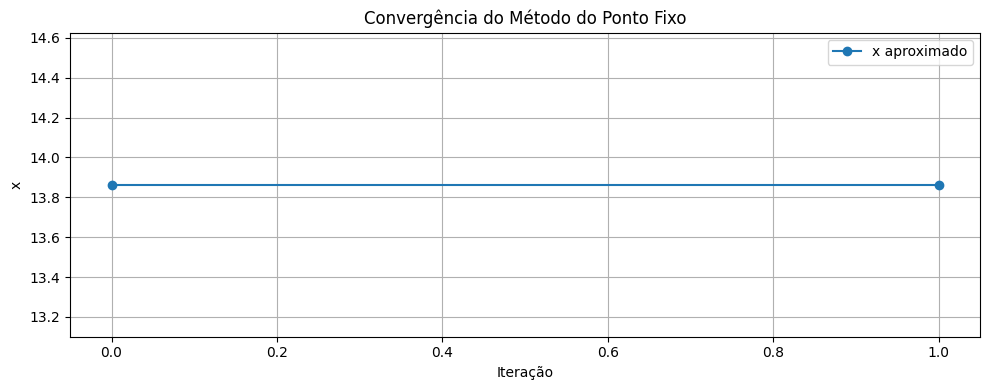

In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Cria função segura a partir de string
def criar_funcao(expr):
    def func(x):
        try:
            return eval(expr, {"x": x, "math": math, "np": np})
        except:
            return float('nan')
    return func

# Método do ponto fixo com entrada geral
def ponto_fixo_geral(f_expr, g_expr, x0, tol_percent, max_iter, raiz_verdadeira=None):
    f = criar_funcao(f_expr)
    g = criar_funcao(g_expr)

    iteracoes = []
    valores_x = []
    erros_approx = []
    erros_reais = []

    print("\nIter |     x_n     |    x_(n+1)  |   εa (%)   |  Erro real (%)")
    for i in range(max_iter):
        x1 = g(x0)
        if x1 != 0:
            erro_aprox = abs((x1 - x0) / x1) * 100
        else:
            erro_aprox = float('inf')

        if raiz_verdadeira is not None:
            erro_real = abs((raiz_verdadeira - x1) / raiz_verdadeira) * 100
        else:
            erro_real = float('nan')

        print(f"{i:4d} | {x0:11.7f} | {x1:11.7f} | {erro_aprox:9.4f} | {erro_real:11.4f}")

        iteracoes.append(i)
        valores_x.append(x1)
        erros_approx.append(erro_aprox)
        erros_reais.append(erro_real)

        if erro_aprox < tol_percent:
            print(f"\n✅ Convergiu para x ≈ {x1:.8f} com erro aproximado de {erro_aprox:.4f}%")
            break

        x0 = x1

    # Gráfico da convergência
    plt.figure(figsize=(10, 4))
    plt.plot(iteracoes, valores_x, marker='o', label='x aproximado')
    if raiz_verdadeira is not None:
        plt.axhline(raiz_verdadeira, color='red', linestyle='--', label='x verdadeiro')
    plt.title("Convergência do Método do Ponto Fixo")
    plt.xlabel("Iteração")
    plt.ylabel("x")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Gráfico do erro real percentual
    if raiz_verdadeira is not None:
        plt.figure(figsize=(10, 4))
        plt.plot(iteracoes, erros_reais, marker='x', color='orange', label='Erro real (%)')
        plt.axhline(y=tol_percent, color='gray', linestyle='--', label=f'Tolerância {tol_percent}%')
        plt.title("Erro Real Percentual em Cada Iteração")
        plt.xlabel("Iteração")
        plt.ylabel("Erro Real (%)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# === ENTRADAS DO USUÁRIO ===
try:
    f_expr = input("Digite a função f(x) (ex: math.exp(-x) - x): ")
    g_expr = input("Digite a função g(x) para ponto fixo (ex: math.exp(-x)): ")
    x0 = float(input("Digite o valor inicial x₀: "))
    tol = float(input("Digite o erro percentual de parada (ex: 5 para 5%): "))
    max_iter = int(input("Digite o número máximo de iterações: "))

    raiz_input = input("Digite a raiz verdadeira (ou pressione Enter se não souber): ")
    raiz_verdadeira = float(raiz_input) if raiz_input else None

    ponto_fixo_geral(f_expr, g_expr, x0, tol, max_iter, raiz_verdadeira)

except Exception as e:
    print(f"\n❌ Erro: {e}")


## Resolução da equação utilizando o método do ponto fixo

Queremos resolver:

$$
80e^{-0{,}1t} + 10 = 30
$$

Isolando a exponencial:

$$
80e^{-0{,}1t} = 20 \Rightarrow e^{-0{,}1t} = \frac{1}{4}
$$

Aplicando logaritmo natural:

$$
-0{,}1t = \ln\left(\frac{1}{4}\right) \Rightarrow t = -10 \cdot \ln\left(\frac{1}{4}\right)
$$

A forma de **ponto fixo** exige reescrever a equação como:

$$
t = g(t)
$$

Portanto:

$$
g(t) = -10 \cdot \ln\left(\frac{30 - 10}{80}\right) = -10 \cdot \ln\left(\frac{20}{80}\right) = -10 \cdot \ln\left(\frac{1}{4}\right)
$$

Como essa expressão resulta em uma **constante**, o método do ponto fixo converge imediatamente.

---

Usando x inicial como 1 e um erro percentual de parada de 0.01 encontramos:


✅ **Convergiu para** $(x \approx 13{,}8629436 )$ **com erro aproximado de** 0.0000%

